In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My projects/Hydrogen Storage/sample2000.csv')
df.drop(0,axis=0,inplace=True)
df.shape

(1998, 9)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Density_,GSA_,VSA_,VF_,PV_,LCD_,PLD_,UG_at_PS_,UV_at_PS_
1,0.48,6108.18,2920.11,0.86,1.80,8.42,7.34,7.36,39.88
2,0.37,6827.24,2544.55,0.89,2.39,11.40,10.01,9.28,39.79
3,0.39,4798.80,1878.95,0.88,2.26,12.36,9.42,8.79,39.47
4,0.27,9246.73,2469.10,0.88,3.30,10.39,9.25,11.97,39.45
5,0.40,6701.81,2653.30,0.87,2.20,10.38,9.14,8.63,39.30


In [ ]:
df = df.astype(float)
df.dtypes

Density_     float64
GSA_         float64
VSA_         float64
VF_          float64
PV_          float64
LCD_         float64
PLD_         float64
UG_at_PS_    float64
UV_at_PS_    float64
dtype: object

In [ ]:
duplicates = df.duplicated().any()
print(duplicates)

False


In [ ]:
missing = df.isnull().any()
print(missing)

Density_     False
GSA_         False
VSA_         False
VF_          False
PV_          False
LCD_         False
PLD_         False
UG_at_PS_    False
UV_at_PS_    False
dtype: bool


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Find the lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers for each feature
num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Print the number of outliers for each feature
print(num_outliers)

Density_      75
GSA_          64
VSA_         139
VF_           61
PV_           97
LCD_          60
PLD_         130
UG_at_PS_     69
UV_at_PS_      0
dtype: int64


In [ ]:
# replace the outliers with mean
#df = df.mask(df < lower_bound, np.nan)
#df = df.mask(df > upper_bound, np.nan)
#df = df.fillna(df.mean())

In [ ]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [ ]:
df.describe()

,Density_,GSA_,VSA_,VF_,PV_,LCD_,PLD_,UG_at_PS_,UV_at_PS_
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,0.711141,3117.985839,2050.607623,0.754628,1.150725,11.467491,7.766400,3.561658,25.508430
std,0.195475,1010.519331,335.573310,0.057129,0.374715,3.472016,1.856376,1.505158,5.238312
min,0.360000,1129.960000,1107.200000,0.590000,0.490000,4.760000,3.910000,1.430000,18.700000
25%,0.580000,2253.562500,1871.220000,0.720000,0.852500,8.650000,6.620000,2.380000,20.592500
50%,0.680000,3063.920000,2058.755000,0.750000,1.085000,11.025000,7.470000,3.100000,24.290000
75%,0.840000,3718.925000,2210.187500,0.800000,1.380000,13.310000,8.745000,4.570000,29.615000
max,1.300000,6531.470000,2937.330000,0.940000,2.310000,22.420000,13.290000,8.440000,39.880000


In [ ]:
X = df.iloc[:,0:7]
Y = df.iloc[:,7:9]

In [ ]:
print(Y.iloc[0:5,:])

    UG_at_PS_  UV_at_PS_
1        7.36      39.88
6        7.52      39.29
7        6.63      39.05
9        8.25      38.96
14       5.88      38.48


# **Visualization**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


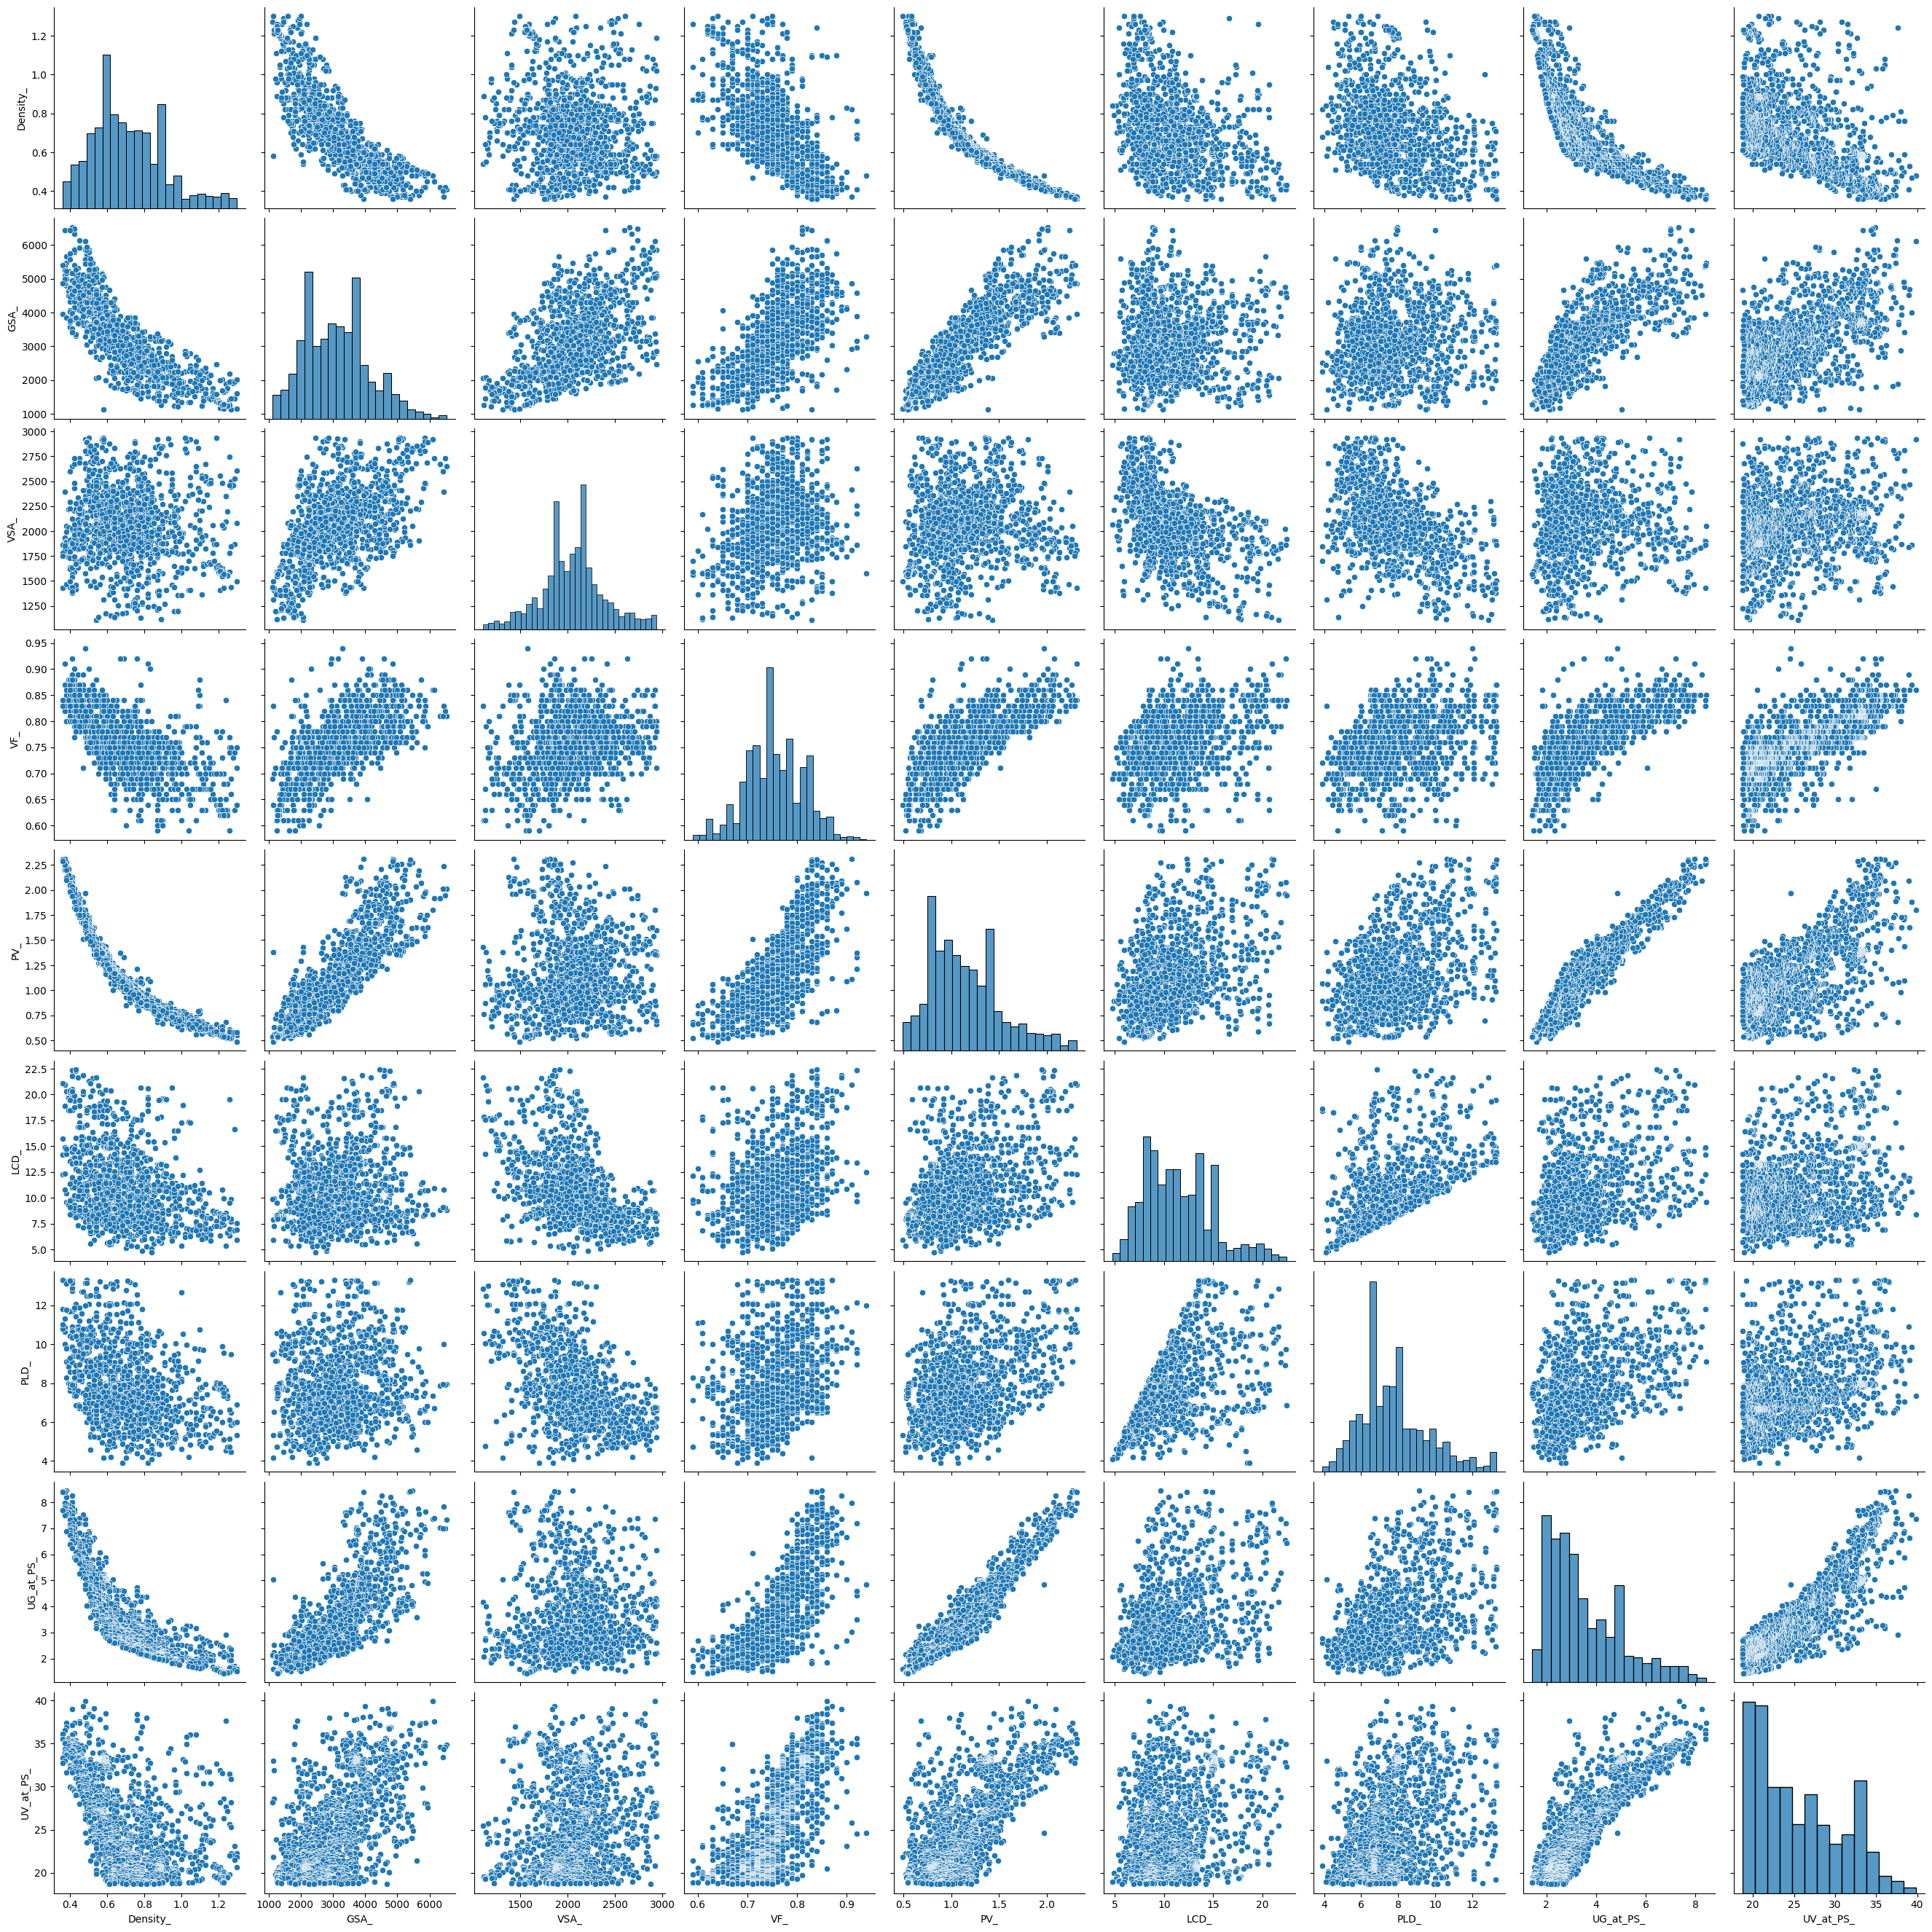

In [ ]:
Features= df.iloc[:,0:7]
OutPut= df.iloc[:,7:9]
sns.pairplot(df, size=3, aspect=1);

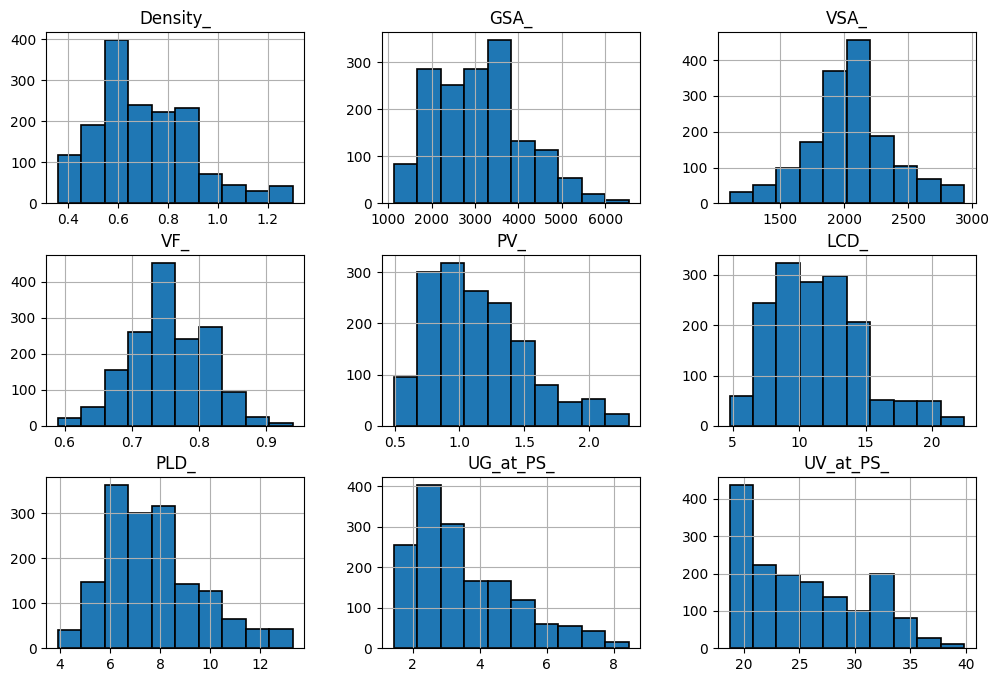

In [ ]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

<Axes: >

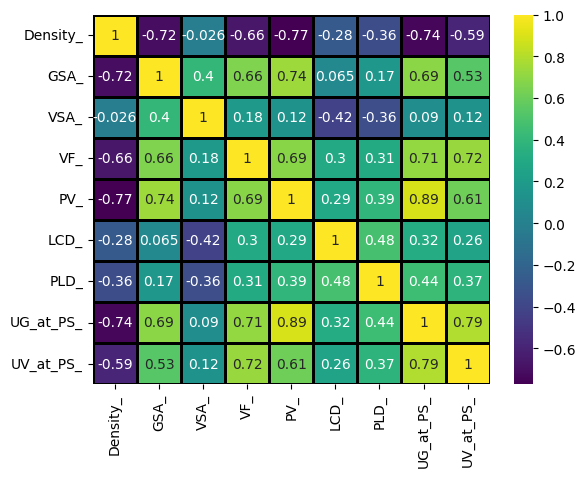

In [ ]:
sns.heatmap(df.corr(), linewidth=2, linecolor='black', cmap='viridis', annot=True)

In [ ]:
f, axes= plt.subplots(7,2)
sns.boxplot(OutPut, color='r');

# **Data preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.70, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(1110, 7)
(142, 7)
(334, 7)


In [ ]:
pd.DataFrame(X_test).describe()

,Density_,GSA_,VSA_,VF_,PV_,LCD_,PLD_
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.708521,3118.353521,2025.916620,0.751127,1.157183,11.509718,7.782887
std,0.202467,1040.170540,321.940322,0.059835,0.394108,3.494310,1.852635
min,0.370000,1259.000000,1132.730000,0.590000,0.540000,5.510000,4.750000
25%,0.580000,2229.222500,1857.150000,0.720000,0.840000,8.802500,6.692500
50%,0.650000,3063.275000,2067.885000,0.750000,1.120000,10.910000,7.560000
75%,0.857500,3723.245000,2192.702500,0.790000,1.380000,13.720000,8.512500
max,1.300000,6424.800000,2901.230000,0.910000,2.310000,20.940000,13.280000


In [ ]:
pd.DataFrame(y_test).describe()

,UG_at_PS_,UV_at_PS_
count,142.000000,142.000000
mean,3.560282,25.202958
std,1.577662,5.240129
min,1.450000,18.760000
25%,2.310000,20.512500
50%,2.970000,23.725000
75%,4.840000,29.937500
max,7.980000,35.480000


In [ ]:
y_test.to_excel('real_values.xlsx', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
Scaled_X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)
Scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
#Scaled_X_train['UG_at_PS'] = y_train.iloc[:,0]
#Scaled_X_train['UV_at_PS'] = y_train.iloc[:,1]
#Scaled_X_valid['UG_at_PS'] = y_valid.iloc[:,0]
#Scaled_X_valid['UV_at_PS'] = y_valid.iloc[:,1]
#Scaled_X_test['UG_at_PS']  = y_test.iloc[:,0]
#Scaled_X_test['UV_at_PS']  = y_test.iloc[:,1]

#Scaled_X_train.to_csv('Scaled_train_set.csv', index=False)
#Scaled_X_valid.to_csv('Scaled_Validation_set.csv', index=False)
#Scaled_X_test.to_csv('Scaled_test_set.csv', index=False)

In [ ]:
print(X_train.iloc[0:20,0:7])

      Density_     GSA_     VSA_   VF_   PV_   LCD_   PLD_
1093      0.62  3342.20  2081.10  0.83  1.23  14.03   7.36
1738      0.62  3403.79  2117.37  0.76  1.22   9.14   8.12
884       0.82  1514.20  1241.02  0.76  0.93  16.17  10.51
855       0.86  2506.47  2208.54  0.67  0.78  12.63   6.04
952       0.54  2059.60  1107.20  0.83  1.43  21.62  12.85
375       0.59  3686.83  2174.16  0.81  1.38  15.11   7.92
1203      0.60  3573.60  2133.56  0.76  1.27  12.17   7.54
844       0.53  4639.50  2439.60  0.83  1.49   9.60   8.17
1986      0.68  3451.27  2348.11  0.74  1.09   8.27   7.02
1754      0.88  2163.33  1901.99  0.69  0.79  13.19   6.67
1335      0.98  2069.99  2035.81  0.73  0.74  11.12   6.79
789       0.56  3369.01  1896.08  0.77  1.37  10.66   8.88
606       0.43  3858.73  1669.50  0.78  1.81  13.40  10.42
1950      0.73  2919.66  2123.47  0.72  0.99   8.38   7.08
836       0.57  3323.40  1890.80  0.79  1.35  10.67   8.89
451       0.61  3589.18  2192.47  0.81  1.33  14.85   7.

In [ ]:
print(Scaled_X_train.iloc[0:20,0:7])

    Density_      GSA_      VSA_       VF_       PV_      LCD_      PLD_
0  -0.484897  0.228923  0.055261  1.315943  0.229679  0.744970 -0.199553
1  -0.484897  0.290769  0.163907  0.088614  0.202832 -0.645814  0.213376
2   0.528634 -1.606697 -2.461179  0.088614 -0.575746  1.353616  1.511929
3   0.731340 -0.610291  0.437004 -1.489380 -0.978459  0.346790 -0.916746
4  -0.890309 -1.059023 -2.862034  1.315943  0.766629  2.903672  2.783316
5  -0.636926  0.574989  0.334020  0.965278  0.632392  1.052137  0.104711
6  -0.586250  0.461287  0.212404  0.088614  0.337069  0.215960 -0.101754
7  -0.940986  1.531630  1.129139  1.315943  0.927714 -0.514984  0.240542
8  -0.180838  0.338447  0.855083 -0.262051 -0.146186 -0.893255 -0.384284
9   0.832693 -0.954861 -0.481259 -1.138715 -0.951611  0.506062 -0.574449
10  1.339458 -1.048590 -0.080404 -0.437384 -1.085849 -0.082675 -0.509250
11 -0.788956  0.255844 -0.498962  0.263947  0.605544 -0.213505  0.626305
12 -1.447751  0.747606 -1.177677  0.439280  1.78683

# **Simple NN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

model0 = Sequential()
model0.add(Dense(120, input_dim=7, activation='relu'))
model0.add(BatchNormalization())
model0.add(Dense(120, activation='relu'))
model0.add(BatchNormalization())
model0.add(Dense(2, activation='linear'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model0.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse', 'mae', 'accuracy'])

In [ ]:
history = model0.fit(Scaled_X_train, y_train, batch_size=50, epochs=40, verbose=1, validation_data=(Scaled_X_valid, y_valid), shuffle=True)

Epoch 1/40
23/23 [==============================] - 2s 15ms/step - loss: 111.8353 - mse: 111.8353 - mae: 7.0705 - accuracy: 0.9135 - val_loss: 35.4102 - val_mse: 35.4102 - val_mae: 4.7727 - val_accuracy: 1.0000
Epoch 2/40
23/23 [==============================] - 0s 5ms/step - loss: 11.6065 - mse: 11.6065 - mae: 2.2943 - accuracy: 1.0000 - val_loss: 10.7607 - val_mse: 10.7607 - val_mae: 2.3070 - val_accuracy: 1.0000
Epoch 3/40
23/23 [==============================] - 0s 5ms/step - loss: 5.6571 - mse: 5.6571 - mae: 1.4972 - accuracy: 1.0000 - val_loss: 6.8203 - val_mse: 6.8203 - val_mae: 1.6504 - val_accuracy: 1.0000
Epoch 4/40
23/23 [==============================] - 0s 5ms/step - loss: 5.7427 - mse: 5.7427 - mae: 1.4910 - accuracy: 1.0000 - val_loss: 4.5920 - val_mse: 4.5920 - val_mae: 1.3394 - val_accuracy: 1.0000
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 4.7165 - mse: 4.7165 - mae: 1.3512 - accuracy: 1.0000 - val_loss: 4.5369 - val_mse: 4.5369 - val_mae:

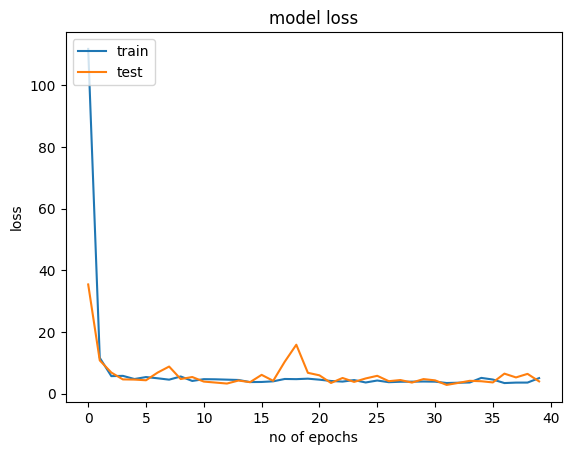

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

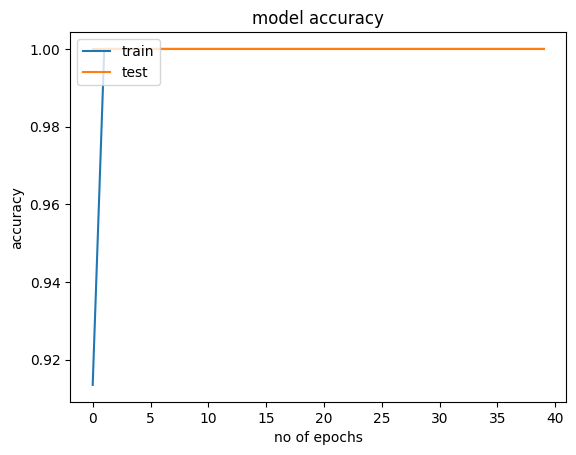

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
preds = model0.evaluate(Scaled_X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 4.4695 - mse: 4.4695 - mae: 1.3026 - accuracy: 1.0000


In [ ]:
y_pred = pd.DataFrame(model0.predict(Scaled_X_test), columns=y_test.columns)
y_pred.to_excel('MLP_predicted.xlsx', index=False)

5/5 [==============================] - 0s 3ms/step


## **NN for UG**

In [ ]:
y_train_UG = y_train.iloc[:,0]
y_valid_UG = y_valid.iloc[:,0]
y_test_UG = y_test.iloc[:,0]
print(y_train_UG.iloc[0:10])

1093    3.42
1738    2.83
884     2.92
855     2.84
952     4.16
375     4.88
1203    3.45
844     4.34
1986    2.44
1754    2.08
Name: UG_at_PS_, dtype: float64


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

model1 = Sequential()
model1.add(Dense(120, input_dim=7, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(120, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='linear'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[ 'mae', 'accuracy'])

In [ ]:
history = model1.fit(Scaled_X_train, y_train_UG, batch_size=100, epochs=50, verbose=1, validation_data=(Scaled_X_valid, y_valid_UG), shuffle=True)

Epoch 1/50
12/12 [==============================] - 2s 25ms/step - loss: 12.9011 - mae: 2.6874 - accuracy: 0.0000e+00 - val_loss: 13.2741 - val_mae: 2.5933 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 1.0781 - mae: 0.8595 - accuracy: 0.0000e+00 - val_loss: 8.9622 - val_mae: 2.1246 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.5003 - mae: 0.5823 - accuracy: 0.0000e+00 - val_loss: 2.0127 - val_mae: 1.0982 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2940 - mae: 0.4123 - accuracy: 0.0000e+00 - val_loss: 1.7389 - val_mae: 1.0541 - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.2227 - mae: 0.3700 - accuracy: 0.0000e+00 - val_loss: 0.6519 - val_mae: 0.6057 - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.2208 - mae: 0.3691 - ac

In [ ]:
preds = model1.evaluate(X_test, y_test_UG)

5/5 [==============================] - 0s 4ms/step - loss: 504089.4688 - mae: 666.5658 - accuracy: 0.0000e+00


## **NN for UV**

In [ ]:
y_train_UV = y_train.iloc[:,1]
y_valid_UV = y_valid.iloc[:,1]
y_test_UV = y_test.iloc[:,1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

model2 = Sequential()
model2.add(Dense(120, input_dim=7, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(120, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='linear'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[ 'mae', 'accuracy'])

In [ ]:
history = model2.fit(X_train, y_train_UV, batch_size=100, epochs=50, verbose=1, validation_data=(X_valid, y_valid_UV), shuffle=True)

Epoch 1/50
12/12 [==============================] - 2s 23ms/step - loss: 401.4094 - mae: 18.3474 - accuracy: 0.0000e+00 - val_loss: 23520.9004 - val_mae: 149.8642 - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 72.8469 - mae: 7.0838 - accuracy: 0.0000e+00 - val_loss: 344.5107 - val_mae: 15.3199 - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 32.8833 - mae: 4.5194 - accuracy: 0.0000e+00 - val_loss: 894.1013 - val_mae: 27.9046 - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 19.3760 - mae: 3.6875 - accuracy: 0.0000e+00 - val_loss: 48.1970 - val_mae: 5.3240 - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 17.8268 - mae: 3.2433 - accuracy: 0.0000e+00 - val_loss: 65.6190 - val_mae: 6.6032 - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 15.846

In [ ]:
preds = model2.evaluate(X_test, y_test_UV)

5/5 [==============================] - 0s 4ms/step - loss: 29.8652 - mae: 4.4188 - accuracy: 0.0000e+00


# **LightGBM**

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

my_lgbm = LGBMRegressor(n_estimators=600, max_depth=12, learning_rate=0.05, num_leaves=10)
multioutput_lgbm = MultiOutputRegressor(my_lgbm)
multioutput_lgbm.fit(Scaled_X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 7
[LightGBM] [Info] Start training from score 3.543297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 7
[LightGBM] [Info] Start training from score 25.534171


MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.05, max_depth=12,
                                             n_estimators=600, num_leaves=10))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lgbm_fcst = multioutput_lgbm.predict(Scaled_X_valid)

r2 = r2_score(y_valid, lgbm_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_valid, lgbm_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_valid, lgbm_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_valid, lgbm_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.9482722  0.77262971]
Mean squared error: [0.11684548 6.06525604]
Root Mean squared error: [0.34182668 2.46277405]
Mean absolute error: [0.24380255 1.69602002]


In [ ]:
lgbm_fcst = multioutput_lgbm.predict(Scaled_X_test)

r2 = r2_score(y_test, lgbm_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, lgbm_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, lgbm_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, lgbm_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.94407033 0.75709657]
Mean squared error: [0.13822963 6.62290291]
Root Mean squared error: [0.37179245 2.57350013]
Mean absolute error: [0.24856199 1.83815644]


In [ ]:
y_pred = pd.DataFrame(multioutput_lgbm.predict(Scaled_X_test), columns=y_test.columns)
#y_pred = multioutput_lgbm.predict(Scaled_X_test)
y_pred.to_excel('LGBM_predicted.xlsx', index=False)
y_test.to_excel('real_values.xlsx', index=False)
#y_pred_sorted = y_pred[np.argsort(y_test)]
#y_test_sorted = y_test.to_numpy()[np.argsort(y_test)]


## **Applying Optuna on LGBM**



In [ ]:
!pip install optuna

In [ ]:
import optuna

def objective(trial):

      n_estimators = trial.suggest_int('n_estimators', 10, 600, 10)
      max_depth = trial.suggest_int('max_depth', 2, 40, 2)
      learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
      num_leaves = trial.suggest_int('num_leaves', 2, 90, 2)
      grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])

      lgbm = LGBMRegressor (n_estimators=n_estimators,
                           objective = 'regression',
                           max_depth = max_depth,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           grow_policy = grow_policy )

      multioutput_lgbm = MultiOutputRegressor(lgbm)
      multioutput_lgbm.fit(X_train, y_train)
      lgbm_fcst = multioutput_lgbm.predict(X_valid)

      return mean_squared_error(y_valid, lgbm_fcst)

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=50)

print(study.best_params)

In [ ]:
trial = study.best_trial
print('Loss: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Loss: 2.83768288312903
Best hyperparameters: {'n_estimators': 480, 'max_depth': 34, 'learning_rate': 0.1335958171329626, 'num_leaves': 76, 'grow_policy': 'lossguide'}


In [ ]:

my_lgbm1 = LGBMRegressor(n_estimators=480, max_depth=34, learning_rate=0.1335958171329626, num_leaves=76, grow_policy='lossguide')
multioutput_lgbm1 = MultiOutputRegressor(my_lgbm)
multioutput_lgbm1.fit(Scaled_X_train, y_train)

In [ ]:
lgbm_fcst1 = multioutput_lgbm1.predict(Scaled_X_test)

r2 = r2_score(y_test, lgbm_fcst1, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, lgbm_fcst1, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, lgbm_fcst1, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, lgbm_fcst1, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.94058577 0.75387417]
Mean squared error: [0.14684168 6.71076355]
Root Mean squared error: [0.38319927 2.59051415]
Mean absolute error: [0.25530371 1.83484761]


# **XGBoost**


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

my_xgb = xgb.XGBRegressor(n_estimators=600, max_depth=12, learning_rate=0.05)
multioutput_xgb = MultiOutputRegressor(my_xgb)
multioutput_xgb.fit(Scaled_X_train, y_train)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=12,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=600, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

xgb_fcst = multioutput_xgb.predict(Scaled_X_valid)

r2 = r2_score(y_valid, xgb_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_valid, xgb_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_valid, xgb_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_valid, xgb_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.93990319 0.75283507]
Mean squared error: [0.13574982 6.59329141]
Root Mean squared error: [0.36844243 2.56774053]
Mean absolute error: [0.24458058 1.64883421]


In [ ]:
xgb_fcst = multioutput_xgb.predict(Scaled_X_test)

r2 = r2_score(y_test, xgb_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, xgb_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, xgb_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, xgb_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.93448608 0.76157846]
Mean squared error: [0.161917   6.50070166]
Root Mean squared error: [0.40238911 2.54964736]
Mean absolute error: [0.26966609 1.72471772]


In [ ]:
y_pred = pd.DataFrame(multioutput_xgb.predict(Scaled_X_test), columns=y_test.columns)
y_pred.to_excel('XGB_predicted.xlsx', index=False)

## **Applying Optuna on XGBoost**


In [ ]:
import optuna

def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 10, 600, 10)
      max_depth = trial.suggest_int('max_depth', 2, 40, 2)
      learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
      grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])


      xgb1 = xgb.XGBRegressor (
                              objective = 'reg:squarederror',
                              tree_method = 'hist',
                              n_estimators=n_estimators,
                              max_depth = max_depth,
                              learning_rate = learning_rate,
                              grow_policy = grow_policy )

      multioutput_xgb = MultiOutputRegressor(xgb1)
      multioutput_xgb.fit(Scaled_X_train, y_train)
      lgbm_fcst = multioutput_lgbm.predict(Scaled_X_valid)

      return mean_squared_error(y_valid, lgbm_fcst)

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=50)

print(study.best_params)

[I 2023-11-17 11:15:47,083] A new study created in memory with name: no-name-aec702a3-2bc2-4610-81de-f3af7347b5d8
[I 2023-11-17 11:15:47,783] Trial 0 finished with value: 2.8683561487715155 and parameters: {'n_estimators': 280, 'max_depth': 24, 'learning_rate': 0.7048701787302268, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 2.8683561487715155.
[I 2023-11-17 11:15:48,247] Trial 1 finished with value: 2.8683561487715155 and parameters: {'n_estimators': 240, 'max_depth': 32, 'learning_rate': 0.8018736350885444, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 2.8683561487715155.
[I 2023-11-17 11:15:48,690] Trial 2 finished with value: 2.8683561487715155 and parameters: {'n_estimators': 250, 'max_depth': 18, 'learning_rate': 0.7458629784097668, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 2.8683561487715155.
[I 2023-11-17 11:15:49,428] Trial 3 finished with value: 2.8683561487715155 and parameters: {'n_estimators': 490, 'max_depth': 24, 'learning_rate': 0.6

{'n_estimators': 280, 'max_depth': 24, 'learning_rate': 0.7048701787302268, 'grow_policy': 'lossguide'}


In [ ]:
my_xgb1 = xgb.XGBRegressor(n_estimators=280, max_depth=24, learning_rate=0.7048701787302268, grow_policy ='lossguide', tree_method = 'hist')
multioutput_xgb1 = MultiOutputRegressor(my_xgb1)
multioutput_xgb1.fit(Scaled_X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy='lossguide',
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.7048701787302268,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=24,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=280, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
xgb1_fcst = multioutput_xgb1.predict(Scaled_X_test)

r2 = r2_score(y_test, xgb1_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, xgb1_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, xgb1_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, xgb1_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.92531141 0.70955295]
Mean squared error: [0.18459211 7.91920727]
Root Mean squared error: [0.42964184 2.81410861]
Mean absolute error: [0.27886771 1.88336664]


# **Gradient Boosted Trees**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

my_gbrt = GradientBoostingRegressor(n_estimators=600, max_depth=12, learning_rate=0.05)
multioutput_gbrt = MultiOutputRegressor(my_gbrt)
multioutput_gbrt.fit(Scaled_X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=12,
                                                         n_estimators=600))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

gbrt_fcst = multioutput_gbrt.predict(Scaled_X_valid)

r2 = r2_score(y_valid, gbrt_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_valid, gbrt_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_valid, gbrt_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_valid, gbrt_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.91290273 0.68811798]
Mean squared error: [0.19673988 8.31966339]
Root Mean squared error: [0.4435537  2.88438267]
Mean absolute error: [0.28586176 1.83256703]


In [ ]:
gbrt_fcst = multioutput_gbrt.predict(Scaled_X_test)

r2 = r2_score(y_test, gbrt_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, gbrt_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, gbrt_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, gbrt_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.91900917 0.68348252]
Mean squared error: [0.20016804 8.6300326 ]
Root Mean squared error: [0.44740143 2.93769171]
Mean absolute error: [0.28022359 1.92655672]


In [ ]:
y_pred = pd.DataFrame(multioutput_gbrt.predict(Scaled_X_test), columns=y_test.columns)
y_pred.to_excel('GBT_predicted.xlsx', index=False)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

my_rf = RandomForestRegressor(n_estimators=600, max_depth=12)
multioutput_rf = MultiOutputRegressor(my_rf)
multioutput_rf.fit(Scaled_X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=12,
                                                     n_estimators=600))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_fcst = multioutput_rf.predict(Scaled_X_valid)

r2 = r2_score(y_valid, rf_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_valid, rf_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_valid, rf_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_valid, rf_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.94698024 0.78139554]
Mean squared error: [0.11976382 5.83142153]
Root Mean squared error: [0.34606909 2.41483364]
Mean absolute error: [0.23704067 1.67657836]


In [ ]:
rf_fcst = multioutput_rf.predict(Scaled_X_test)

r2 = r2_score(y_test, rf_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, rf_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, rf_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, rf_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.94545609 0.7979874 ]
Mean squared error: [0.13480474 5.50799062]
Root Mean squared error: [0.36715764 2.34691087]
Mean absolute error: [0.2441612  1.61235278]


In [ ]:
y_pred = pd.DataFrame(multioutput_rf.predict(Scaled_X_test), columns=y_test.columns)
y_pred.to_excel('RF_predicted.xlsx', index=False)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

my_knn = KNeighborsRegressor(n_neighbors=5)
multioutput_knn = MultiOutputRegressor(my_knn)
multioutput_knn.fit(Scaled_X_train, y_train)

MultiOutputRegressor(estimator=KNeighborsRegressor())

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

knn_fcst = multioutput_knn.predict(Scaled_X_valid)

r2 = r2_score(y_valid, knn_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_valid, knn_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_valid, knn_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_valid, knn_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.93158036 0.7390494 ]
Mean squared error: [0.15454987 6.96103352]
Root Mean squared error: [0.39312831 2.63837706]
Mean absolute error: [0.26566467 1.78945509]


In [ ]:
knn_fcst = multioutput_knn.predict(Scaled_X_test)

r2 = r2_score(y_test, knn_fcst, multioutput='raw_values')
print('R-squared:', r2)

mse = mean_squared_error(y_test, knn_fcst, multioutput='raw_values')
print('Mean squared error:', mse)

rmse = mean_squared_error(y_test, knn_fcst, multioutput='raw_values', squared=False)
print('Root Mean squared error:', rmse)

mae = mean_absolute_error(y_test, knn_fcst, multioutput='raw_values')
print('Mean absolute error:', mae)

R-squared: [0.92120029 0.72084036]
Mean squared error: [0.1947527  7.61144958]
Root Mean squared error: [0.44130795 2.75888557]
Mean absolute error: [0.285     1.8524507]


In [ ]:
y_pred = pd.DataFrame(multioutput_knn.predict(Scaled_X_test), columns=y_test.columns)
y_pred.to_excel('KNN_predicted.xlsx', index=False)